# Preparation of Training Data
In this notebook, we are preparing the data that will be used to train models. We will be using 2 approachs to make predictions about the sentiments in the tweets.
- Machine Learning Models (SVM, Random Forest etc.)
- BERT (Bidirectional Encoder Representations from Transformer)

To make one final training data file, 
1. External tweets used in a research paper, similar to our approach, which can be found [here](https://arxiv.org/abs/2005.12423) are used.
2. To introduce our own data into the mix, we have filtered tweets with more than 50 likes and then used textblob library to calculate polarity score for each tweet.

Tweets are labeled as:
- Tweets with a high negative polarity(<=-0.5) are labeled as 2
- Tweets with a high positive polarity(>=0.5) are labeled as 1
- Tweets with a 0.0 polarity are labeled as 0

which is consistent with the labelling of tweets in point 1.

3. To balance the negative tweets, tweets containing hate speech are also fetched from [here](https://www.kaggle.com/datasets/dv1453/twitter-sentiment-analysis-analytics-vidya)



**All the files are already minumum cleaned**

Description of minimum cleaned is in notebook Annotated_tweets.ipynb

## 1. Importing libraries

In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nest_asyncio
import nltk
nltk.download('punkt')
from textblob import TextBlob

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
os.chdir('c:\\Users\\Owner\\Desktop\\Sem4\\Capstone\\Project\\')
os.getcwd()

'c:\\Users\\Owner\\Desktop\\Sem4\\Capstone\\Project'

## 2. Annotated external tweets

- 2 is negative, 1 is positive, 0 is neutral


In [43]:
file1=pd.read_csv("data\\minimum_cleaned_ann_tweets.csv")
file1.head()

,Tweet ID,Text,label,Category
0,1242553623260868608,are we still allowed to quote ancient chinese ...,0,neutral
1,1246508137638580225,more power to you! this chinese virus thing h...,0,neutral
2,1233468243534372865,"cnbc: who, tedros reiterated that the virus co...",0,neutral
3,1243626072387747841,"""the heightened racism experienced by asian co...",1,positive
4,1225611530978217989,coronavirus and nepali in china: kp oli has di...,0,neutral


### 2.1. Distribution of labels

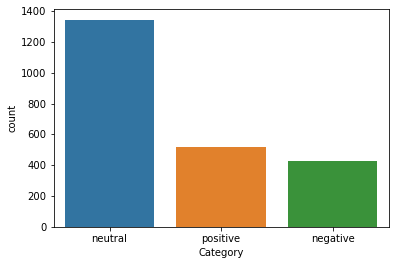

In [44]:
ax = sns.countplot(x="Category", data=file1)
plt.show()

In [45]:
file1=file1.drop(['Category','Tweet ID'],axis=1)

In [46]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2290 non-null   object
 1   label   2290 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 35.9+ KB


## 3. Polarity Score (Training Data)
This section is calculating ploarity score for each tweet with likes more than 50 ad then labelling them as negative, positive and neutral.

In [50]:
train=pd.read_csv("data\\minimum_cleaned_tweets_test.csv")

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505106 entries, 0 to 505105
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Datetime      505106 non-null  object
 1   Tweet Id      505106 non-null  int64 
 2   Text          505106 non-null  object
 3   Location      385264 non-null  object
 4   Retweet       505106 non-null  int64 
 5   Like          505106 non-null  int64 
 6   new_Hashtags  505014 non-null  object
dtypes: int64(3), object(4)
memory usage: 27.0+ MB


In [52]:
train.drop(train[train['Like']<50].index, inplace = True)
train=train.reset_index(drop=True)

In [53]:
train

,Datetime,Tweet Id,Text,Location,Retweet,Like,new_Hashtags
0,2022-05-06 14:27:17,1522583787099791360,trolling chinesevirus musk style,Hindustan,8,60,chinesevirus
1,2022-05-05 17:06:32,1522261473996656640,who estimated covid19 deaths in india is 10 ti...,India,20,54,covid19 chinesevirus
2,2022-04-22 07:47:06,1517409648524992514,"पप्पू जी , you have not yet publicly declared ...",Mumbai,70,176,chinesevirus
3,2022-03-26 12:44:19,1507699969213489158,dead bodies of indian citizens who died due to...,NaN,13,73,indian chinesevirus chinese china
4,2022-03-21 18:04:37,1505968636393046018,peaceful town malegaon has given very poor res...,Mumbai,30,69,chinesevirus
...,...,...,...,...,...,...,...
7158,2018-02-06 16:31:41,960913898651123712,there is been a lot of debate in the aapi comm...,"New York, New York",28,50,aapi
7159,2018-01-27 19:21:30,957332757708865536,thread: trump is targeting “chain migration.” ...,NaN,51,98,aapis aapi
7160,2018-01-22 22:43:52,955571744189816832,the coverage of amazing talent continues today...,"Park City, UT",28,55,music glee darrencriss sundance2018 ascap tale...
7161,2018-01-16 00:30:41,953061912102821889,daca is not just a latino issue. 10% of daca-e...,NaN,34,72,daca aapi aapi


In [36]:
train['polarity']=np.nan

# Sentiment Scoring
for x in range(len(train)):
    analysis = TextBlob(train.Text[x])
    train['polarity'][x]= analysis.sentiment[0]
    

C:\Users\Owner\AppData\Local\Temp/ipykernel_1276/2367467022.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['polarity'][x]= analysis.sentiment[0]


In [37]:
train['polarity']

0       0.000000
1       0.200000
2       0.000000
3      -0.168750
4      -0.090000
          ...   
7158    0.000000
7159    0.000000
7160    0.300000
7161   -0.033333
7162    0.000000
Name: polarity, Length: 7163, dtype: float64

In [38]:
neg=train[train['polarity']<=-0.5]
pos=train[train['polarity']>=0.5]
# train.reset_index(drop=True)

In [39]:
neu=train[train['polarity']==0.0]

In [40]:
neg['label']=2  
pos['label']=1
neu['label']=0

C:\Users\Owner\AppData\Local\Temp/ipykernel_1276/323587114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg['label']=2
C:\Users\Owner\AppData\Local\Temp/ipykernel_1276/323587114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos['label']=1
C:\Users\Owner\AppData\Local\Temp/ipykernel_1276/323587114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [42]:
neg.reset_index(drop=True)


,Datetime,Tweet Id,Text,Location,Retweet,Like,new_Hashtags,polarity,label
0,2022-02-20 12:02:31,1495368264930967553,Has to do this to save his leg. 2 month is to ...,India,59,373,chinesevirus,-0.600000,2
1,2022-02-07 03:09:40,1490523125745733635,"Everyone was sad yesterday so telling today, d...",🇮🇳,26,81,latamangeshkar chinesevirus ckmkb,-0.500000,2
2,2021-08-15 16:06:36,1426938383226458121,"After WHO, UN failed too.ChineseVirus Taliban",India,44,118,chinesevirus taliban,-0.500000,2
3,2021-05-18 08:13:20,1394566763707179012,"Even as India was fighting the ChineseVirus, S...","Chikkamagaluru, India",415,696,chinesevirus congresstoolkitexposed,-0.600000,2
4,2021-05-16 08:40:58,1393848939216916483,Aum Shanti Suryakiran and his father - both su...,"Bengaluru, India",40,156,suryakiran chinesevirus coronasainika,-0.583333,2
...,...,...,...,...,...,...,...,...,...
214,2020-05-14 16:52:52,1260976386426060800,Join and others for is UnitedWeStand virtual a...,A Cheesecake Factory near you,35,161,unitedwestand aapi apahm,-0.800000,2
215,2020-05-01 17:41:33,1256277592153354241,"In 2016, 9% of AsianAmericans and 6% of Chines...",Newport Beach ↔️ NYC,122,194,asianamericans chineseamericans covid__19 asia...,-1.000000,2
216,2019-05-18 19:32:02,1129832034665410561,Vincent Chin would have been 64 today. It is t...,"Seattle, WA",23,66,aapi,-0.800000,2
217,2019-05-18 14:42:52,1129759260798328832,"In honor of VincentChin is birthday, today is ...",NaN,99,247,vincentchin aapi dayagainstbullying acttochange,-0.800000,2


In [43]:
neg=neg.drop(['Datetime','Location','Retweet','Like','new_Hashtags','polarity'],axis=1)
neg.reset_index(drop=True)

,Tweet Id,Text,label
0,1495368264930967553,Has to do this to save his leg. 2 month is to ...,2
1,1490523125745733635,"Everyone was sad yesterday so telling today, d...",2
2,1426938383226458121,"After WHO, UN failed too.ChineseVirus Taliban",2
3,1394566763707179012,"Even as India was fighting the ChineseVirus, S...",2
4,1393848939216916483,Aum Shanti Suryakiran and his father - both su...,2
...,...,...,...
214,1260976386426060800,Join and others for is UnitedWeStand virtual a...,2
215,1256277592153354241,"In 2016, 9% of AsianAmericans and 6% of Chines...",2
216,1129832034665410561,Vincent Chin would have been 64 today. It is t...,2
217,1129759260798328832,"In honor of VincentChin is birthday, today is ...",2


In [44]:
pos.reset_index(drop=True)

,Datetime,Tweet Id,Text,Location,Retweet,Like,new_Hashtags,polarity,label
0,2022-02-19 01:46:40,1494850894898335746,"Tons of love, respect ; regards for your bless...","Nurpur Bedi, Rupnagar, India",58,718,chinesevirus gratitude,0.500000,1
1,2021-09-19 15:12:56,1439608451651547145,BreakingNews Tibetan girl Ms TenzinZomkey has ...,NaN,12,57,breakingnews tenzinzomkey belgium freetibet ct...,0.800000,1
2,2021-09-03 16:06:29,1433823722138308610,Do not let your guard down!Wear mask wherever...,India 🇮🇳,11,274,chinesevirus maskup maskssavelives,0.500000,1
3,2021-08-27 16:48:49,1431297662402252802,INDIA ADMINISTERS MORE THAN 1 CRORE DOSES TODA...,India,3,91,chinesevirus,0.781250,1
4,2021-07-30 11:57:35,1421077510586916871,I am fully vaccinated but will follow all the...,Mumbai,16,81,chinesevirus,0.516667,1
...,...,...,...,...,...,...,...,...,...
644,2018-05-11 19:52:43,995028953361453056,Happy AAPI month! FF comedians/musicians/write...,Brooklyn/Seoul,9,52,aapi ff,0.656250,1
645,2018-05-05 04:18:00,992619395145854976,Kickin’ AsianPacificHeritageMonth off with the...,"Los Angeles, CA",3,86,asianpacificheritagemonth laapff2018 aapi theg...,0.700000,1
646,2018-04-12 16:11:26,984464016029421569,Proud to be standing with so many AAPI advocat...,"Pasadena, CA",23,50,aapi justiceconf18 advancingjustice,0.650000,1
647,2018-04-03 00:07:34,980959959570526209,TheGoodDoctor promotes and to series Regulars ...,NaN,15,74,thegooddoctor retweettosupport breakingnews aapi,0.550000,1


In [45]:
pos=pos.drop(['Datetime','Location','Retweet','Like','new_Hashtags','polarity'],axis=1)
pos.reset_index(drop=True)

,Tweet Id,Text,label
0,1494850894898335746,"Tons of love, respect ; regards for your bless...",1
1,1439608451651547145,BreakingNews Tibetan girl Ms TenzinZomkey has ...,1
2,1433823722138308610,Do not let your guard down!Wear mask wherever...,1
3,1431297662402252802,INDIA ADMINISTERS MORE THAN 1 CRORE DOSES TODA...,1
4,1421077510586916871,I am fully vaccinated but will follow all the...,1
...,...,...,...
644,995028953361453056,Happy AAPI month! FF comedians/musicians/write...,1
645,992619395145854976,Kickin’ AsianPacificHeritageMonth off with the...,1
646,984464016029421569,Proud to be standing with so many AAPI advocat...,1
647,980959959570526209,TheGoodDoctor promotes and to series Regulars ...,1


In [46]:
neu.reset_index(drop=True)

,Datetime,Tweet Id,Text,Location,Retweet,Like,new_Hashtags,polarity,label
0,2022-05-06 14:27:17,1522583787099791360,Trolling Chinesevirus musk style,Hindustan,8,60,chinesevirus,0.0,0
1,2022-04-22 07:47:06,1517409648524992514,"पप्पू जी , you have not yet publicly declared ...",Mumbai,70,176,chinesevirus,0.0,0
2,2022-03-03 04:10:44,1499235802072891393,Will sanctions be applied on China as well fo...,India,11,165,chinesevirus,0.0,0
3,2022-02-06 04:56:36,1490187647951998979,"S. P. Balasubramaniam and now, Lata Mangeshkar...","Hope, Positivity and Optimism",21,145,chinesevirus,0.0,0
4,2022-01-30 04:10:57,1487639443888558080,Blessed with ChineseVirus 🤷‍🥲,काशी,0,56,chinesevirus,0.0,0
...,...,...,...,...,...,...,...,...,...
1850,2018-02-22 20:00:37,966764685763674112,AAPI women must work an extra two months in or...,San Francisco,482,1683,aapi aapiequalpay,0.0,0
1851,2018-02-07 20:00:54,961328938806054915,"Thank you , for recognizing the 130,000 Dreame...","Pasadena, CA",346,887,aapi cleandreamactnow gonancygo,0.0,0
1852,2018-02-06 16:31:41,960913898651123712,There is been a lot of debate in the AAPI comm...,"New York, New York",28,50,aapi,0.0,0
1853,2018-01-27 19:21:30,957332757708865536,Thread: Trump is targeting “chain migration.” ...,NaN,51,98,aapis aapi,0.0,0


In [47]:
neu=neu.drop(['Datetime','Location','Retweet','Like','new_Hashtags','polarity'],axis=1)
neu.reset_index(drop=True)

,Tweet Id,Text,label
0,1522583787099791360,Trolling Chinesevirus musk style,0
1,1517409648524992514,"पप्पू जी , you have not yet publicly declared ...",0
2,1499235802072891393,Will sanctions be applied on China as well fo...,0
3,1490187647951998979,"S. P. Balasubramaniam and now, Lata Mangeshkar...",0
4,1487639443888558080,Blessed with ChineseVirus 🤷‍🥲,0
...,...,...,...
1850,966764685763674112,AAPI women must work an extra two months in or...,0
1851,961328938806054915,"Thank you , for recognizing the 130,000 Dreame...",0
1852,960913898651123712,There is been a lot of debate in the AAPI comm...,0
1853,957332757708865536,Thread: Trump is targeting “chain migration.” ...,0


### 3.1. Concatenating dataframes

We are only concatenating pos and neg dataFrames since we already have enough neutral tweets in tweets from section 2

In [48]:
# final=pd.concat([pos,neg], ignore_index = True)
# final.to_csv('data//balancing_data.csv',index=False)

## 4. Polarized Balancing Data (from test data)


In [16]:
pol=pd.read_csv("data\\minimum_cleaned_balancing_data.csv")
pol

,Tweet Id,Text,label,Category
0,1494850894898335746,"tons of love, respect ; regards for your bless...",1,positive
1,1439608451651547145,breakingnews tibetan girl ms tenzinzomkey has ...,1,positive
2,1433823722138308610,do not let your guard down!wear mask wherever ...,1,positive
3,1431297662402252802,india administers more than 1 crore doses toda...,1,positive
4,1421077510586916871,i am fully vaccinated but will follow all the ...,1,positive
...,...,...,...,...
863,1260976386426060800,join and others for is unitedwestand virtual a...,2,negative
864,1256277592153354241,"in 2016, 9% of asianamericans and 6% of chines...",2,negative
865,1129832034665410561,vincent chin would have been 64 today. it is t...,2,negative
866,1129759260798328832,"in honor of vincentchin is birthday, today is ...",2,negative


In [17]:
pol=pol.drop(['Tweet Id','Category'], axis=1)
pol.reset_index(drop=True)
pol

,Text,label
0,"tons of love, respect ; regards for your bless...",1
1,breakingnews tibetan girl ms tenzinzomkey has ...,1
2,do not let your guard down!wear mask wherever ...,1
3,india administers more than 1 crore doses toda...,1
4,i am fully vaccinated but will follow all the ...,1
...,...,...
863,join and others for is unitedwestand virtual a...,2
864,"in 2016, 9% of asianamericans and 6% of chines...",2
865,vincent chin would have been 64 today. it is t...,2
866,"in honor of vincentchin is birthday, today is ...",2


In [41]:
pol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    868 non-null    object
 1   label   868 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.7+ KB


## 5. Balancing Negative tweets (kaggle dataset)
Since the proportion of negative tweets is still not comparable to positive and neutral tweets, we will be introducing more negative tweets. 

In [107]:
train2=pd.read_csv("data\\minimum_cleaned_train.csv")

In [108]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet ID  31962 non-null  int64 
 1   label     31962 non-null  int64 
 2   Text      31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


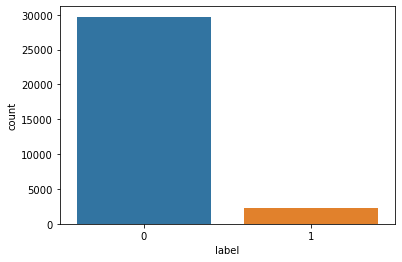

In [109]:
ax = sns.countplot(x="label", data=train2)
plt.show()

In [110]:
train2.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [111]:
# dropping positive tweets
train2.drop(train2[train2.label==0].index, inplace = True)
train2.reset_index(drop=True)

,Tweet ID,label,Text
0,14,1,cnn calls michigan middle school 'build the w...
1,15,1,no comment! in australia opkillingbay seasheph...
2,18,1,retweet if you agree!
3,24,1,lumpy says i am a . prove it lumpy.
4,35,1,it is unbelievable that in the 21st century we...
...,...,...,...
2237,31935,1,lady banned from kentucky mall. jcpenny kentucky
2238,31947,1,omfg i am offended! i am a mailbox and i am p...
2239,31948,1,you do not have the balls to hashtag me as a ...
2240,31949,1,"makes you ask yourself, who am i? then am i a..."


In [112]:
train2.label.value_counts()

1    2242
Name: label, dtype: int64

In [113]:
train2=train2.drop(['Tweet ID',], axis=1)
train2=train2.reset_index(drop=True)


In [114]:
train2['label'] = train2['label'].replace(1,2)
train2 = train2[['Text','label']]

In [115]:
train2.label.value_counts()

2    2242
Name: label, dtype: int64

In [116]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242 entries, 0 to 2241
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2242 non-null   object
 1   label   2242 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 35.2+ KB


In [117]:
train2 = train2.sample(frac=0.30, replace=False, random_state=1)
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 673 entries, 1856 to 2001
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    673 non-null    object
 1   label   673 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [118]:
train2.label.value_counts()

2    673
Name: label, dtype: int64

### 6. Final training data file

Adding labelled tweets from section 4 and  section 5 to already annotated tweets from section 2.

In [119]:
final=pd.concat([file1, pol,train2], ignore_index = True)

final.reset_index(drop=True)


,Text,label
0,are we still allowed to quote ancient chinese ...,0
1,more power to you! this chinese virus thing h...,0
2,"cnbc: who, tedros reiterated that the virus co...",0
3,"""the heightened racism experienced by asian co...",1
4,coronavirus and nepali in china: kp oli has di...,0
...,...,...
3826,sea shepherd suppoers are racist! antiracism s...,2
3827,"no it does not, germans, even fascists rape t...",2
3828,"""nigger?"" lifelessons of white kid growing up ...",2
3829,you do not have the balls to hashtag me as a ...,2


In [120]:
final.to_csv('data//minimum_cleaned_final_training_data.csv',index=False)

In [121]:
final=pd.read_csv("data\\minimum_cleaned_final_training_data.csv")

In [122]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3831 entries, 0 to 3830
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    3831 non-null   object
 1   label   3831 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 60.0+ KB


### 6.1. New Distribution of labels

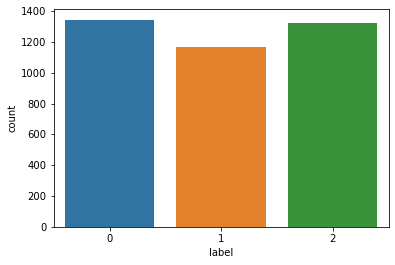

In [123]:
ax = sns.countplot(x="label", data=final)
plt.show()

In [124]:
final.head(10)

,Text,label
0,are we still allowed to quote ancient chinese ...,0
1,more power to you! this chinese virus thing h...,0
2,"cnbc: who, tedros reiterated that the virus co...",0
3,"""the heightened racism experienced by asian co...",1
4,coronavirus and nepali in china: kp oli has di...,0
5,iamnotavirus - heard of it ? why use this imag...,1
6,you have proven over the past 3 years that yo...,0
7,fact: coronavirus will probably come to the u...,0
8,for the last fucking time.... coronavirus is n...,1
9,i think your campaign slogan should be mama -...,0
